C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8178 - loss: 0.7080
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9144 - loss: 0.3105
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9204 - loss: 0.2844
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.2670
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9275 - loss: 0.2664


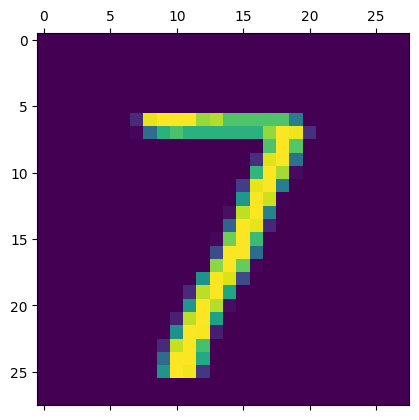

In [1]:
# Digit Classification using Deep Learning

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

(x_train, y_train),(x_test, y_test)= keras.datasets.mnist.load_data()

x_train=x_train/255

plt.matshow(x_train[560])

x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

x_train_flattened.shape

model=keras.Sequential([keras.layers.Dense(10, input_shape=(28*28,),
    activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.fit(x_train_flattened,y_train,epochs=5,callbacks=[tb_callback])

In [9]:
model.evaluate(x_test_flattened,y_test)

y_predicted=model.predict(x_test_flattened)

y_predicted[4]

np.argmax(y_predicted[4])

y_test[4]

y_labels=[np.argmax(i) for i in y_predicted]

cm=tf.math.confusion_matrix(labels=y_test, predictions=y_labels)
cm

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True Values")

# Flattening using keras and Hidden Layers Added

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

model.evaluate(x_test,y_test)

y_predicted=model.predict(x_test)
y_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_labels)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True Values")

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=uint8)
  • training=False
  • mask=None

In [8]:
tb_callback=keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)